In [1]:
import os
from pylab import *
from pysb.core import *
from pysb.bng import *
from pysb.integrate import *
import matplotlib.pyplot as plt
import numpy as np
from pysb.util import alias_model_components
from pysb.simulator import CupSodaSimulator
from pysb.simulator import ScipyOdeSimulator
from pysb.simulator.bng import BngSimulator
import sys
sys.path.append('../')
sys.path.append('/home/ildefog/main/Projects/NERM/')
sys.path.append('/home/ildefog/main/Projects/NERM/param_files/')
from model_files.nerm_pvals import model 
import pandas as pd
from scipy import stats
from pysb.simulator import SimulationResult
import logging
import os
from pysb.logging import setup_logger
from pysb.simulator.cupsoda import CupSodaSimulator
from pysb.simulator.scipyode import ScipyOdeSimulator
from sensitivity_analysis4 import InitialsSensitivity
from pysb.util import update_param_vals
from scipy.stats import norm,uniform, halfnorm
from pysb.tools.sensitivity_analysis import PairwiseSensitivity
os.environ['OMP_NUM_THREADS'] = '1'
from scipy.optimize import curve_fit

In [2]:
c0 = np.load('../NecroptosisSens/cluster0/necro_pars10k_cluster0_5720_mod.npy')[:,14:]
c1 = np.load('../NecroptosisSens/cluster1/necro_pars10k_cluster1_5720_mod.npy')[:,14:]
c2 = np.load('../NecroptosisSens/cluster2/necro_pars10k_cluster2_5720_mod.npy')[:,14:]
c3 = np.load('../NecroptosisSens/cluster3/necro_pars10k_cluster3_5720_mod.npy')[:,14:]

In [ ]:
c3[6]

In [ ]:
n_pars = len(c3)
all_pars = np.zeros((n_pars, len(model.parameters)))

rate_params = model.parameters_rules()
param_values = np.array([p.value for p in model.parameters])
rate_mask = np.array([p in rate_params for p in model.parameters])

for i in range(n_pars):
    par = c3[i]
    param_values[rate_mask] = par
    all_pars[i] = param_values

In [ ]:
print(list(model.initial_conditions))

In [ ]:
tspan = np.linspace(0,1440,1441)
m = model.components

In [ ]:
solverwtm1 = ScipyOdeSimulator(model, tspan=tspan, verbose = True)
mode1wtm1  = solverwtm1.run(initials = {m.C8(bf=None, flip=None, state='I'):1899},
                                        param_values=all_pars, num_processors = 20)
mode1df_wtm1 = mode1wtm1.dataframe

In [ ]:
fig, ax = plt.subplots()
for n in range(len(all_pars)):
    plt.plot(tspan/60, mode1df_wtm1.loc[n]['MLKLa_obs'].iloc[:]/5544, lw=1.5, 
             zorder = 1)
# colormap = plt.cm.Reds #nipy_spectral, Set1,Paired   
# colors = [colormap(i) for i in np.linspace(0, 1,len(ax.lines))]
# for i,j in enumerate(ax.lines):
#     j.set_color(colors[i])
# ax1.legend(loc=2)    
plt.xlabel("Time (hours)", fontsize=15)
plt.ylabel("pMLKL (normalized)", fontsize=15)
plt.xlim(xmin = 0, xmax = 16)
plt.ylim(ymin = 0)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
right_side = ax.spines["right"]
right_side.set_visible(False)
top = ax.spines["top"]
top.set_visible(False)
ax.set_xticks([0, 5, 10, 15, 20, 24])
ax.grid(False)
plt.tight_layout()
# plt.savefig('pmlkl_allpars_clus0_tnf100_noframe.pdf')
plt.show() 

In [ ]:
thresh = 2772
ttdkd = []
for j in range(len(c2)):
#     print(f"this is output line {j}")
    i_range = range(len(mode1df_wtm1.loc[j]['MLKLa_obs']))
    for i in i_range:
#         print(m3alldf100wt.loc[j]['MLKLa_obs'].iloc[i])
        if mode1df_wtm1.loc[j]['MLKLa_obs'].iloc[i] > thresh:
            ttdkd.append(mode1df_wtm1.loc[j].index[i])
            break
        if i == i_range[-1]:
            ttdkd.append(np.inf)
for i in range(len(ttdkd)):
    if ttdkd[i] == np.inf:
        ttdkd[i] = 2100            
print()        
# print(ttdkd)
print(len(ttdkd))
# print('TTD = ', m3alldf100wt['time'][idx])        

In [ ]:
solverwtm12 = ScipyOdeSimulator(model, tspan=tspan, verbose = True)
mode1wtm12  = solverwtm12.run(param_values=all_pars, num_processors = 20)
mode1df_wtm12 = mode1wtm12.dataframe

In [ ]:
thresh = 2772
ttd = []
for j in range(len(c2)):
#     print(f"this is output line {j}")
    i_range = range(len(mode1df_wtm12.loc[j]['MLKLa_obs']))
    for i in i_range:
#         print(m3alldf100wt.loc[j]['MLKLa_obs'].iloc[i])
        if mode1df_wtm12.loc[j]['MLKLa_obs'].iloc[i] > thresh:
            ttd.append(mode1df_wtm12.loc[j].index[i])
            break
        if i == i_range[-1]:
            ttd.append(np.inf)
for i in range(len(ttd)):
    if ttd[i] == np.inf:
        ttd[i] = 2100            
print()        
# print(ttd)
print(len(ttd))
# print('TTD = ', m3alldf100wt['time'][idx])       

In [ ]:
solverwtm13 = ScipyOdeSimulator(model, tspan=tspan, verbose = True)
mode1wtm13  = solverwtm13.run(initials = {m.C8(bf=None, flip=None, state='I'):5698},
                                        param_values=all_pars, num_processors = 20)
mode1df_wtm13 = mode1wtm13.dataframe

In [ ]:
thresh = 2772
ttdoe = []
for j in range(len(c2)):
#     print(f"this is output line {j}")
    i_range = range(len(mode1df_wtm13.loc[j]['MLKLa_obs']))
    for i in i_range:
#         print(m3alldf100wt.loc[j]['MLKLa_obs'].iloc[i])
        if mode1df_wtm13.loc[j]['MLKLa_obs'].iloc[i] > thresh:
            ttdoe.append(mode1df_wtm13.loc[j].index[i])
            break
        if i == i_range[-1]:
            ttdoe.append(np.inf)
for i in range(len(ttdoe)):
    if ttdoe[i] == np.inf:
        ttdoe[i] = 2100            
print()        
print(len(ttdoe))
# print('TTD = ', m3alldf100wt['time'][idx])        

In [ ]:
mode2dfn = pd.DataFrame({'WT': ttd,
                            'KD': ttdkd,
                        'OE':ttdoe})
framesm4 = [mode2dfn]
dfclus4 = pd.DataFrame(data = pd.concat(framesm4), columns = ['WT','KD','OE'])
dfm4fadd = pd.melt(dfclus4)

In [ ]:
import seaborn as sns
sns.set(style="whitegrid")
sns.color_palette("hls", 8)
fig, ax = plt.subplots(figsize = (15,10))
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.5)
my_pal = {"WT": "red", "KD": "lightcoral", "OE":"darkred"}
# b = sns.boxplot(x = "value", y ="variable", data = dfclus0, notch = True, width = 0.5, palette = my_pal)
b = sns.swarmplot(x="value", y="variable", data=dfm4fadd, zorder=2)
# b = sns.boxplot(x = "value", y ="variable", data = dfclus0, notch = True, width = 0.5, palette = my_pal)
b.set_xlabel("Time (m)",fontsize=25)
plt.xticks(fontsize = 25)
# b.set_ylabel("Cluster 0 New",fontsize=15)
b.tick_params(labelsize=25)
plt.xlim(xmax = 2110, xmin = 1)
ax.set_xticks([0,300, 600, 900, 1200,1500, 1800])
plt.tight_layout()
# plt.savefig('pmlkl_cylda20dko_100tnf_mode1_swarm_redcolors.pdf')
plt.show()

In [ ]:
with open('necro_5720mode4_paramk7tnf100_test.txt', 'w') as f:
   for p, v in zip(model.parameters, mode1wtm1.param_values[0]):
       f.write('{},{:e}\n'.format(p.name, v))

In [3]:
def update_param_vals(model, newvals):
    """update the values of model parameters with the values from a dict.
    the keys in the dict must match the parameter names
    """
    update = []
    noupdate = []
    for i in model.parameters:
        if i.name in newvals:
            i.value = newvals[i.name]
            update.append(i.name)
        else:
            noupdate.append(i.name)
    return update, noupdate

In [4]:
setup_logger(logging.INFO, file_output='necroclusters2large_5720.log', console_output=True)
observable = 'MLKLa_obs'

tspan = np.array([30, 90, 270, 480, 600, 720, 840, 960, 1080, 1200, 1320, 1440])

def likelihood(mlkl_traj):
    #Here we fit a spline to find where we get 50% release of MOMP reporter
#     ysim_mlkl_norm = mlkl_traj/np.nanmax(mlkl_traj)
#     threshold = 2772
    threshold = np.nanmax(mlkl_traj)/2
#     print(threshold)
    
    st, sc, sk = scipy.interpolate.splrep(tspan, mlkl_traj)
    
    tspan2 = np.linspace(tspan[0], tspan[-1], 1000)
    mlkl_traj2 = scipy.interpolate.splev(tspan2, (st, sc, sk))
    for i in range(len(mlkl_traj2)):
        if mlkl_traj2[i] > threshold:
            td = tspan2[i]
            break 
        if i == len(mlkl_traj2)-1:   
            td = np.nan

    return td
# def likelihood(mlkl_traj):
#     #Here we fit a spline to find where we get 50% release of MOMP reporter
#     ysim_mlkl_norm = mlkl_traj / 2772 #np.nanmax(mlkl_traj)
#     st, sc, sk = scipy.interpolate.splrep(tspan, ysim_mlkl_norm)
#     try:
#         t10 = scipy.interpolate.sproot((st, sc - 0.10, sk))[0]
#         t90 = scipy.interpolate.sproot((st, sc - 0.90, sk))[0]
#     except IndexError:
#         t10 = 0
#         t90 = 0

#     # time of death  = halfway point between 10 and 90%
#     td = (t10 + t90) / 2

#     return td

def run():
    vals = np.linspace(0.5, 1.5, 5)
    new_params2 = pd.read_csv('necro_5720mode4_paramk7tnf100_test.txt',
        index_col=0, names=['name', 'value']).to_dict('dict')['value']

    update_param_vals(model, new_params2)

    use_cupsoda = False
    if use_cupsoda:
        integrator_opt = {'rtol': 1e-6, 'atol': 1e-6, 'max_steps': 20000,
                          'memory_usage': 'global', 'vol': 1e-19}
        solver = CupSodaSimulator(model, t, verbose=True, gpu=0,
                                  integrator_options=integrator_opt,
                                  )
    else:
        integrator_opt_scipy = {'rtol': 1e-6, 'atol': 1e-6, 'mxstep': 20000}
        solver = ScipyOdeSimulator(model, tspan=tspan, integrator='lsoda',
                                   integrator_options=integrator_opt_scipy)
    sens = InitialsSensitivity(
        solver,
        values_to_sample=vals,
        observable=observable,
        objective_function=likelihood, sens_type='initials')  #

    sens.run('output_{}', out_dir=out_dir)
    sens.create_heatplot(save_name='mode4k7heatinew', out_dir=out_dir)
    InitialsSensitivity.create_boxplot(sens, save_name='mode4k7boxinew', out_dir=out_dir, show = True)
#     sens.create_boxplot(save_name='mode1k12boxpnew', out_dir=out_dir)
#     sens.create_individual_pairwise_plots(save_name='mode1k12inew', out_dir=out_dir)


# if __name__ == '__main__':
#     out_dir = 'clus0mnec1_5421'
#     run()
#     process()
#     load()


2022-01-10 19:55:07.717 - pysb - INFO - Logging started on PySB version 1.11.0
2022-01-10 19:55:07.719 - pysb - INFO - Log entry time offset from UTC: -6.00 hours


2022-01-10 19:55:13.117 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Simulator created
2022-01-10 19:55:14.478 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Simulator created


2022-01-10 19:55:14.852 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Equation mode set to "cython"
2022-01-10 19:55:15.445 - pysb.simulator.scipyode - INFO - [model_files.nerm_pvals] Simulation(s) started
2022-01-10 19:55:15.487 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Single processor (serial) mode
2022-01-10 19:55:15.634 - pysb.simulator.scipyode - INFO - [model_files.nerm_pvals] All simulation(s) complete
2022-01-10 19:55:15.635 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] SimulationResult constructor started


2022-01-10 19:55:15.691 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] SimulationResult constructor finished
2022-01-10 19:55:15.693 - pysb.simulator.scipyode - INFO - [model_files.nerm_pvals] Simulation(s) started
2022-01-10 19:55:15.842 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] Multi-processor (parallel) mode using 20 processes


2771.999999999441


2022-01-10 19:57:11.095 - pysb.simulator.scipyode - INFO - [model_files.nerm_pvals] All simulation(s) complete
2022-01-10 19:57:11.097 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] SimulationResult constructor started
2022-01-10 19:57:11.984 - pysb.simulator.scipyode - DEBUG - [model_files.nerm_pvals] SimulationResult constructor finished


2772.0000000260106
2772.000000122978
2772.0000000370137
2772.0000000270084
2772.0000001695894
2772.0000003007776
2772.00000009366
2772.0000000370137
2772.0000000017826
2772.00000034945
2772.000000008666
2772.000000000311
2772.0000000370137
2772.0000005370284
2772.000000008808
2772.0000000016144
2772.0000000002624
2772.0000000370137
2772.0000003338782
2771.999999993841
2772.0000000533496
2772.000000000606
2772.0000000370137
2772.000000124477
2772.0000000010236
2772.000000010214
2772.00000024745
2772.0000000370137
2772.000000205669
2772.0000000932337
1386.0000000993919
2079.0000001867247
2772.0000000370137
3465.0000000004884
4158.000000004612
2772.0000000015634
2772.0000000533746
2772.0000000370137
2772.000000037921
2772.000000007873
2772.0000000637438
2772.0000000144178
2772.0000000370137
2772.0000000541213
2772.0000000093814
2772.000000067638
2772.00000000206
2772.0000000370137
2772.0000000112864
2772.000000012046
2772.000000175269
2772.00000000397
2772.0000000370137
2772.000000160007


2772.0000000210725
2772.000000071941
2772.0000000153173
2772.0000000100435
2772.0000000024565
2772.0000001263174
2772.0000000810264
2772.000000045606
2772.000000012289
2772.0000000024565
2772.000000042228
2772.0000000639734
2771.99999995742
2772.00000001277
2772.0000000024565
2772.0000000190107
2772.000000001026
2772.0000000035957
2771.9999999996808
2772.0000000024565
2772.000000030237
2771.99999999999
2772.000000030249
2772.0000000015925
2771.999999999631
2772.000000216978
2771.999999992525
2772.0000001149097
2772.0000003346117
2771.999999999631
2772.00000000084
2772.000000188263
2772.0000000000086
2772.000000280434
2771.999999999631
2772.00000004041
2772.000000001634
2772.0000002093343
2772.0000000165587
2771.999999999631
2772.0000002560446
2772.000000014412
2771.9999999996307
2772.0000000245914
2771.999999999631
2772.0000001135577
2772.000000071196
1386.0000001432977
2078.999999975113
2771.999999999631
3465.0000000618074
4158.000000047509
2772.0000000971722
2772.0000000027
2771.9999

2772.0000000064774
2772.00000000405
2772.0000000050595
2772.0000000095233
2772.000000111782
2772.0000001404665
2772.000000139289
2771.99999999996
2772.000000337261
2772.0000000741134
2772.0000001404665
2772.000000000389
2771.9999999956854
2772.000000083015
2772.000000094019
2772.0000001404665
2772.0000000026034
2771.9999999971237
1386.0000000001203
2078.999999999361
2772.0000001404665
3465.000000160682
4158.000000009392
2772.0000000081827
2772.0000000303944
2772.0000001404665
2771.9999999990077
2772.000000182448
2772.0000000499886
2772.000000161964
2772.0000001404665
2772.0000000930895
2772.000000003875
2772.000000000939
2772.000000011282
2772.0000001404665
2772.0000000303985
2771.9999999995434
2772.0000000104524
2771.9999999777115
2772.0000001404665
2772.0000000194837
2772.0000000001023
2772.0000002174584
2772.000000001465
2772.0000001404665
2772.000000099795
2772.0000000080718
2772.0000002288793
2772.000000004701
2772.0000001404665
2772.0000000784457
2772.0000002662223
2772.000000007

2772.0000000016366
2772.0000000658465
2772.0000000843606
2771.999999991052
2771.9999999910638
2772.0000000650653
2772.0000000658465
2772.0000000010778
2772.000000007193
2772.0000000051296
2772.000000047185
2772.0000000658465
2772.0000000009395
2772.000000024812
2772.000000140701
2772.0000000250984
2772.0000000658465
2772.0000001416665
2772.0000000045256
2772.000000098824
2772.0000000118953
2772.0000000658465
2772.0000000695536
2772.000000038353
2772.0000000290097
2772.0000001232725
2772.0000000658465
2772.0000000793257
2771.99999999883
1386.0000000222599
2079.0000000267796
2771.999999999441
3464.9999999987085
4158.000000037315
2771.9999999996976
2772.000000024791
2771.999999999441
2772.000000103597
2772.0000000015193
2772.0000002746806
2772.000000043838
2771.999999999441
2771.9999999998936
2771.999999999952
2772.000000585797
2772.0000000227797
2771.999999999441
2772.0000000107557
2772.000000066696
2772.000000000072
2772.00000000057
2771.999999999441
2772.0000000006867
2772.0000000105
2

2772.0000000107557
2772.0000000162286
2771.9999999969305
2772.0000000382247
2772.000000013286
2772.0000000107557
2772.0000003719115
2772.000000014184
2772.0000000007913
2772.000000007048
2772.0000000107557
2772.000000045934
2772.000000055602
2772.0000001537273
2772.000000087022
2772.000000066696
2772.000000065449
2772.0000001253884
2772.00000002968
2772.000000022278
2772.000000066696
2772.0000000442733
2772.000000012647
2772.000000006161
2771.999999988015
2772.000000066696
2772.00000010583
2772.000000015801
2771.9999999896772
2772.0000001009553
2772.000000000072
2772.0000000159484
2772.000000021144
2772.00000006921
2772.0000000379664
2772.000000000072
2771.999999988632
2772.0000002687148
2772.0000000005803
2772.0000000017326
2772.00000000057
2772.0000000276013
2772.000000072721
2772.000000026957
2772.0000000020364
2772.00000000057
2772.0000000121527
2772.000000024842
2772.0000000414207
2771.9999999959423
2771.999999999441
2772.0000000244727
2772.000000041057
2772.000000141745
2772.0000

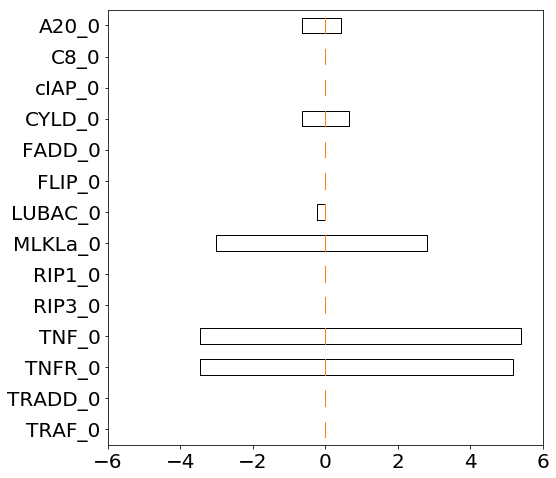

In [5]:
if __name__ == '__main__':
    model_v = 'necro'
    # all parameter fits from pso
#     p_set = 'all_params_24_part_200_iter_2_bound_0.1_speed.csv'
    params = pd.read_csv('necro_5720mode4_paramk7tnf100_test.txt',
        index_col=0, names=['name', 'value']).to_dict('dict')['value']
#     print(len(params))
    # how many sens analysis to run
    n_sets = 1

    # spacing for sens analysis
    vals = np.linspace(.5, 1.5, 5)

    solver = ScipyOdeSimulator(model, tspan, integrator='lsoda',
                               verbose=True,
                               use_analytic_jacobian=True,
                               compiler='cython',
                               integrator_options={"rtol": 1e-6,
                                                   "atol": 1e-6})
    # The observable of the model
    observable = 'MLKLa_obs'
    sens = InitialsSensitivity(
        values_to_sample=vals,
        observable=observable,
        objective_function=likelihood,
        solver=solver,sens_type = 'initials'
    )
    out_dir = 'mode4_initials_k7_testsensfileerror2'
#     out_dir = p_set.split(',')[0]
#     if not os.path.exists(out_dir):
#         os.mkdir(out_dir)
    run()
#     process()
#     load()